Your Name: Kieran Fitzmaurice

Consider a chain of four identical masses connected by five ideal springs. We will neglect the effects of gravity for simplicity. Your task is to make an animation that shows the chain vibrating horizontally at each of its four *eigenfrequencies*.

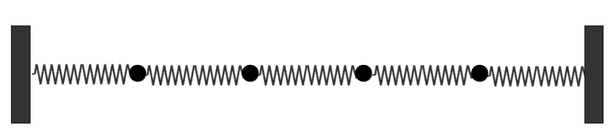

Let $x_0$, $x_1$, $x_2$, and $x_3$ be the horizontal displacement of each mass from equilibrium. (For example, in the figure above, $x_0 = x_1 = x_2 = x_3 = 0$. Verify that the potential energy of the chain is
$$V = \tfrac12 k x_0^2 + \tfrac12 k(x_1-x_0)^2 + \tfrac12 k(x_2-x_1)^2 + \tfrac12 k(x_3-x_2)^2 + \tfrac12 k x_3^2\,,$$
where we have one term for each of the five springs.

Using
$$F_i=-\frac{\partial V}{\partial x_i} = m\ddot{x_i}\,,$$
write down the four equations of motion that govern the four masses. 

Equations of Motion:

$$ \ddot{x_0} = \frac{k}{m} (-2 x_0 + x_1) $$
$$ \ddot{x_i} = \frac{k}{m} (x_{i-1} - 2 x_i + x_{i+1}) $$
$$ \ddot{x_N} = \frac{k}{m} (x_{N-1} - 2 x_N) $$

To find the eigenfrequencies $\omega$ of the system, we exploit the fact that the solution to a simple harmonic oscillator takes the form $\ddot{x_i} = -\omega^2 x_i$.
Put the equations you wrote above into the form
$$k\mathbf{Mx}=-m\omega^2\mathbf{x}$$
$$\mathbf{Mx}=-\frac{m}{k}\omega^2\mathbf{x}$$
$$\mathbf{Mx}=-\frac{\omega^2}{\omega_0^2}\mathbf{x}\,,$$
where $\mathbf{M}$ is a matrix with the coefficients from the equation of motion and $\omega_0=\sqrt{k/m}$ is the natural frequency of each spring. We'll choose units where $\omega_0 = 1$. We are thus left with an eigenvalue problem!
$$\mathbf{Mx}=-\omega^2\mathbf{x}\,$$
where $\omega$ are the *eigenfrequencies* (be careful, they are the square root of the eigenvalues and they should all be real).

Find the eigenfrequencies and associated eigenvectors for this system, and print them.

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

N = 4
w0 = 1

M = np.zeros((N,N))

M[0,0] = -2
M[0,1] = 1
M[N-1,N-1] = -2
M[N-1,N-2] = 1

for i in range(1,N-1):
    M[i,i-1] = 1
    M[i,i] = -2
    M[i,i+1] = 1
    
eigenvalues, eigenvectors = la.eigh(M)
w = np.sqrt(-1*eigenvalues)

print("Eigenvectors:\n",eigenvectors)
print("Eigenfrequencies:\n",w)



Eigenvectors:
 [[-0.37174803  0.60150096 -0.60150096  0.37174803]
 [ 0.60150096 -0.37174803 -0.37174803  0.60150096]
 [-0.60150096 -0.37174803  0.37174803  0.60150096]
 [ 0.37174803  0.60150096  0.60150096  0.37174803]]
Eigenfrequencies:
 [ 1.90211303  1.61803399  1.1755705   0.61803399]


Now it's time to create the animation.

Recall that the time-dependent solution to a simple harmonic oscillator is
$$x_i(t) = A_i\sin(\omega t + \phi)\,,$$
where $A_i$ is the amplitude and $\phi$ is the phase. In other words, when the chain is driven at an arbitrary frequency $\omega$, all four masses move with that same frequency, but different amplitudes and phases. In general, the values of these amplitudes and phases are not obvious.

However, if the system is driven at an eigenfrequency, the resulting amplitudes of the four masses are exactly the elements of the associated eigenvector (or more precisely, are proportional to the elements of the eigenvector, since we've normalized them). The phase is either zero (if the element is positive) or $\pi$ (if the element is negative). However, it's easiest to just set $\phi=0$ and instead make the amplitude be positive or negative.

Starting with the static plot below, make an animation that shows the chain moving at each of its four eigenfrequencies. The masses are spaced such that you can use the egenvectors as the amplitudes without any rescaling. Your animation doesn't need to loop smoothly, but should be long enough that the motions of the masses are clear.

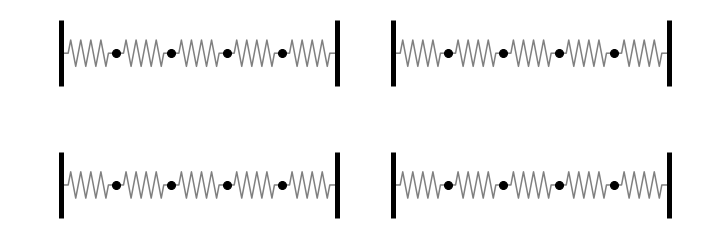

In [2]:
#feel free to use these functions as-is or modify this code as you see fit

import numpy as np
import matplotlib.pyplot as plt


def draw_spring(xi, xf, y, dy=0.2):
    """
    Draws a horizontal spring.
    Inputs: xi = inital x-coordinate
            xf = final x-coordinate
            y  = y-coordinate of spring
            dy = thickness of spring
    """
    x = np.linspace(xi, xf, 23)
    y = np.array([y]*4 + [y+dy, y, y-dy, y]*4 + [y]*3)
    spring = plt.Line2D(x, y, linestyle="-", color="gray", zorder=-1)
    ax = plt.gca()                      #                        ^
    ax.add_line(spring)                 # draw behind everything else


def draw_chain(anchor, x_offsets):
    """
    Draw a chain of five springs and four masses.
    Inputs: anchor    = (x,y) coordinate of left side of chain
            x_offsets = Sequence of displacements from equilibrium
                        position. Keep these values less than 1.
    """
    x0, y0 = anchor
    x = x0 + np.arange(2, 10, 2) + x_offsets
    
    #draw springs
    draw_spring(x0, x[0], y0)
    draw_spring(x[0], x[1], y0)
    draw_spring(x[1], x[2], y0)
    draw_spring(x[2], x[3], y0)
    draw_spring(x[3], x0+10, y0)
    
    #draw masses
    plt.plot(x, [y0]*4, "ko", ms=8)
    
    #draw edges
    plt.vlines([x0, x0+10], y0 - 0.5, y0 + 0.5, "k", lw=5)

#static example where all displacements are zero
fig = plt.figure(figsize=(12,4))
draw_chain((1, 3), np.zeros(4))
draw_chain((13, 3), np.zeros(4))
draw_chain((1, 1), np.zeros(4))
draw_chain((13, 1), np.zeros(4))
plt.axis("off")
plt.show()

In [3]:
from matplotlib.animation import FuncAnimation 
from IPython.display import HTML

numframe = 250
delay_in_ms = 100

def animate(frame):
    plt.clf()
    t = 30*np.pi*frame/numframe
    x1 = eigenvectors[0]*np.sin(w[0]*t)
    x2 = eigenvectors[1]*np.sin(w[1]*t)
    x3 = eigenvectors[2]*np.sin(w[2]*t)
    x4 = eigenvectors[0]*np.sin(w[3]*t)
    
    draw_chain((1, 3), x1)
    draw_chain((13, 3), x2)
    draw_chain((1, 1), x3)
    draw_chain((13, 1), x4)
    plt.axis("off")
    
    
fig = plt.figure(figsize = (12,4))

anim = FuncAnimation(fig, animate, frames = numframe, interval = delay_in_ms)
HTML(anim.to_html5_video())